<a href="https://colab.research.google.com/github/umayu06/Object-Detection/blob/master/digi-recog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

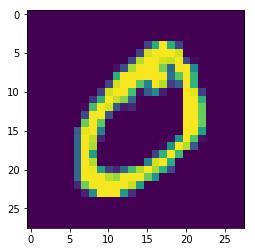

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
from keras.utils import to_categorical#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0] 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')
	# normalize to range 0-1
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten#create model
model = Sequential()#add model layers
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
#model.add(Conv2D(64, kernel_size=3, activation=’relu’,input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 139us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0466 - val_acc: 0.9871
Epoch 2/3
60000/60000 [==============================] - 8s 138us/step - loss: 0.0138 - acc: 0.9956 - val_loss: 0.0442 - val_acc: 0.9871
Epoch 3/3
60000/60000 [==============================] - 8s 136us/step - loss: 0.0100 - acc: 0.9967 - val_loss: 0.0564 - val_acc: 0.9859


In [0]:
acc = model.evaluate(X_test, y_test, verbose=0)
print(acc[1]*100)


98.59


In [0]:
model.predict(X_test[:4])

array([[1.4618791e-11, 2.0534964e-10, 1.9163370e-07, 2.9543069e-06,
        1.2671926e-13, 1.3094119e-09, 5.9200133e-16, 9.9999607e-01,
        9.7305417e-09, 7.6758596e-07],
       [8.6530036e-08, 1.9445704e-06, 9.9979144e-01, 6.8610295e-10,
        1.6499858e-10, 1.6411519e-12, 2.0649841e-04, 1.1037687e-13,
        5.7787403e-08, 3.4476196e-14],
       [1.7921525e-06, 9.9716562e-01, 7.4192707e-05, 1.0536436e-06,
        2.1947208e-03, 8.2833212e-06, 1.0211139e-05, 4.7734208e-04,
        6.5447493e-05, 1.3502781e-06],
       [9.9792910e-01, 3.3289616e-10, 6.9581851e-04, 9.7397175e-09,
        3.7484754e-06, 2.0196251e-07, 1.2665772e-03, 9.4148226e-07,
        6.8018744e-06, 9.6828357e-05]], dtype=float32)

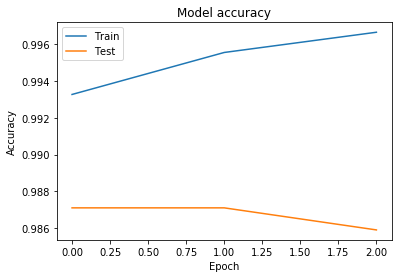

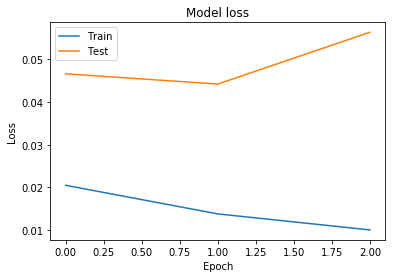

In [0]:
import matplotlib.pyplot as plt

#history = model.fit(trainX, trainY, validation_split=0.25, epochs=50, batch_size=32, verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

https://github.com/mayanksatnalika/transfer_learning/blob/master/transfer.ipynb

In [0]:
model.save('digirec.h5')

In [0]:
import numpy as np
import cv2

(28, 28)
(1, 28, 28, 1)


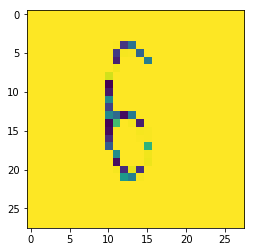

In [0]:
import keras
from keras import backend 
img=cv2.imread('6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(28,28))
print(img.shape)
plt.imshow(img)
img = np.expand_dims(img, axis=0)#to expand the dim of image to 4D 
img = img.reshape(1,28,28,1)
#img=np.squeeze(img) #to reduce the dim of image
#img=np.resize(img,(1,28,28,3))
print(img.shape)


In [0]:
img=X_train[1]
img = img.reshape(1,28,28,1)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


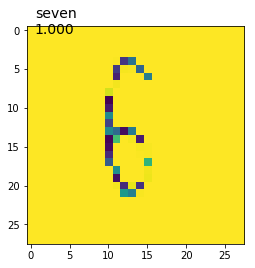

In [0]:
LABEL_NAMES = ['zero','one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
plt.imshow(np.squeeze(img))

#cpu_model = define_model()
model.load_weights('./digirec.h5')
print(model.predict(img))

from matplotlib import pyplot
%matplotlib inline


def plot_predictions(images, predictions):
   
    
    label = LABEL_NAMES[np.argmax(predictions)]
    confidence = np.max(predictions)
    pyplot.imshow(images)
    pyplot.text(0.5, 0.5, label + '\n%.3f' % confidence, fontsize=14)

   # pyplot.gcf().set_size_inches(8, 8)  

plot_predictions(np.squeeze(img), 
                 model.predict(img))